# **PROJECT 3 - Introduction to Machine Learning and Artificial Intelligence**

Here is the interactive code for the third project. This project investigates applications for Principal Component Analysis (PCA) and k-Means Clustering algorithms as unsupervised learnings methods in two parts.

In the first part, a dataset from The World Bank is used that contains some development indicators for the EU countries. The purpose of this part is to utilize PCA in order to reduce the dataset dimensions to 2D for visualization. This helps to understand better the patterns within the data as well as to gain some intuition regarding the relationships between different indicators.

In the second part, k-means clustering is applied on a handwritten digits dataset available at the University of California Irvine Machine Learning repository. The idea is that k-means clustering algorithm is capable of grouping data points based on the distribution of their features.

***There are some optional hints added for each question at the end of this page.***

# **Part 1 - Dimensionality Reduction and Data Visualization**
PCA is an unsupervised algorithm that reduces the number of dimensions in the data which also can be utilized for visualization, feature extraction, noise reduction and so on.

In this part of the project, a dataset is acquired from The World Bank public database as an international financial institution containing several economic development indicators for EU countries from the year 2015. The total of 10 indicators are selected including GDP growth annual (%), GDP per capita (K USD), GDP current (T USD), GNI per capita (K USD), Exports of goods and services (% of GDP), Foreign direct investment (B USD), Inflation consumer prices (annual %), Unemployment total (% of total labor force), Total tax and contribution rate (% of profit), Life expectancy at birth total (years). Here, PCA algorithm is utilized for dimensionality reduction to 2D therefore the data can be visualized.

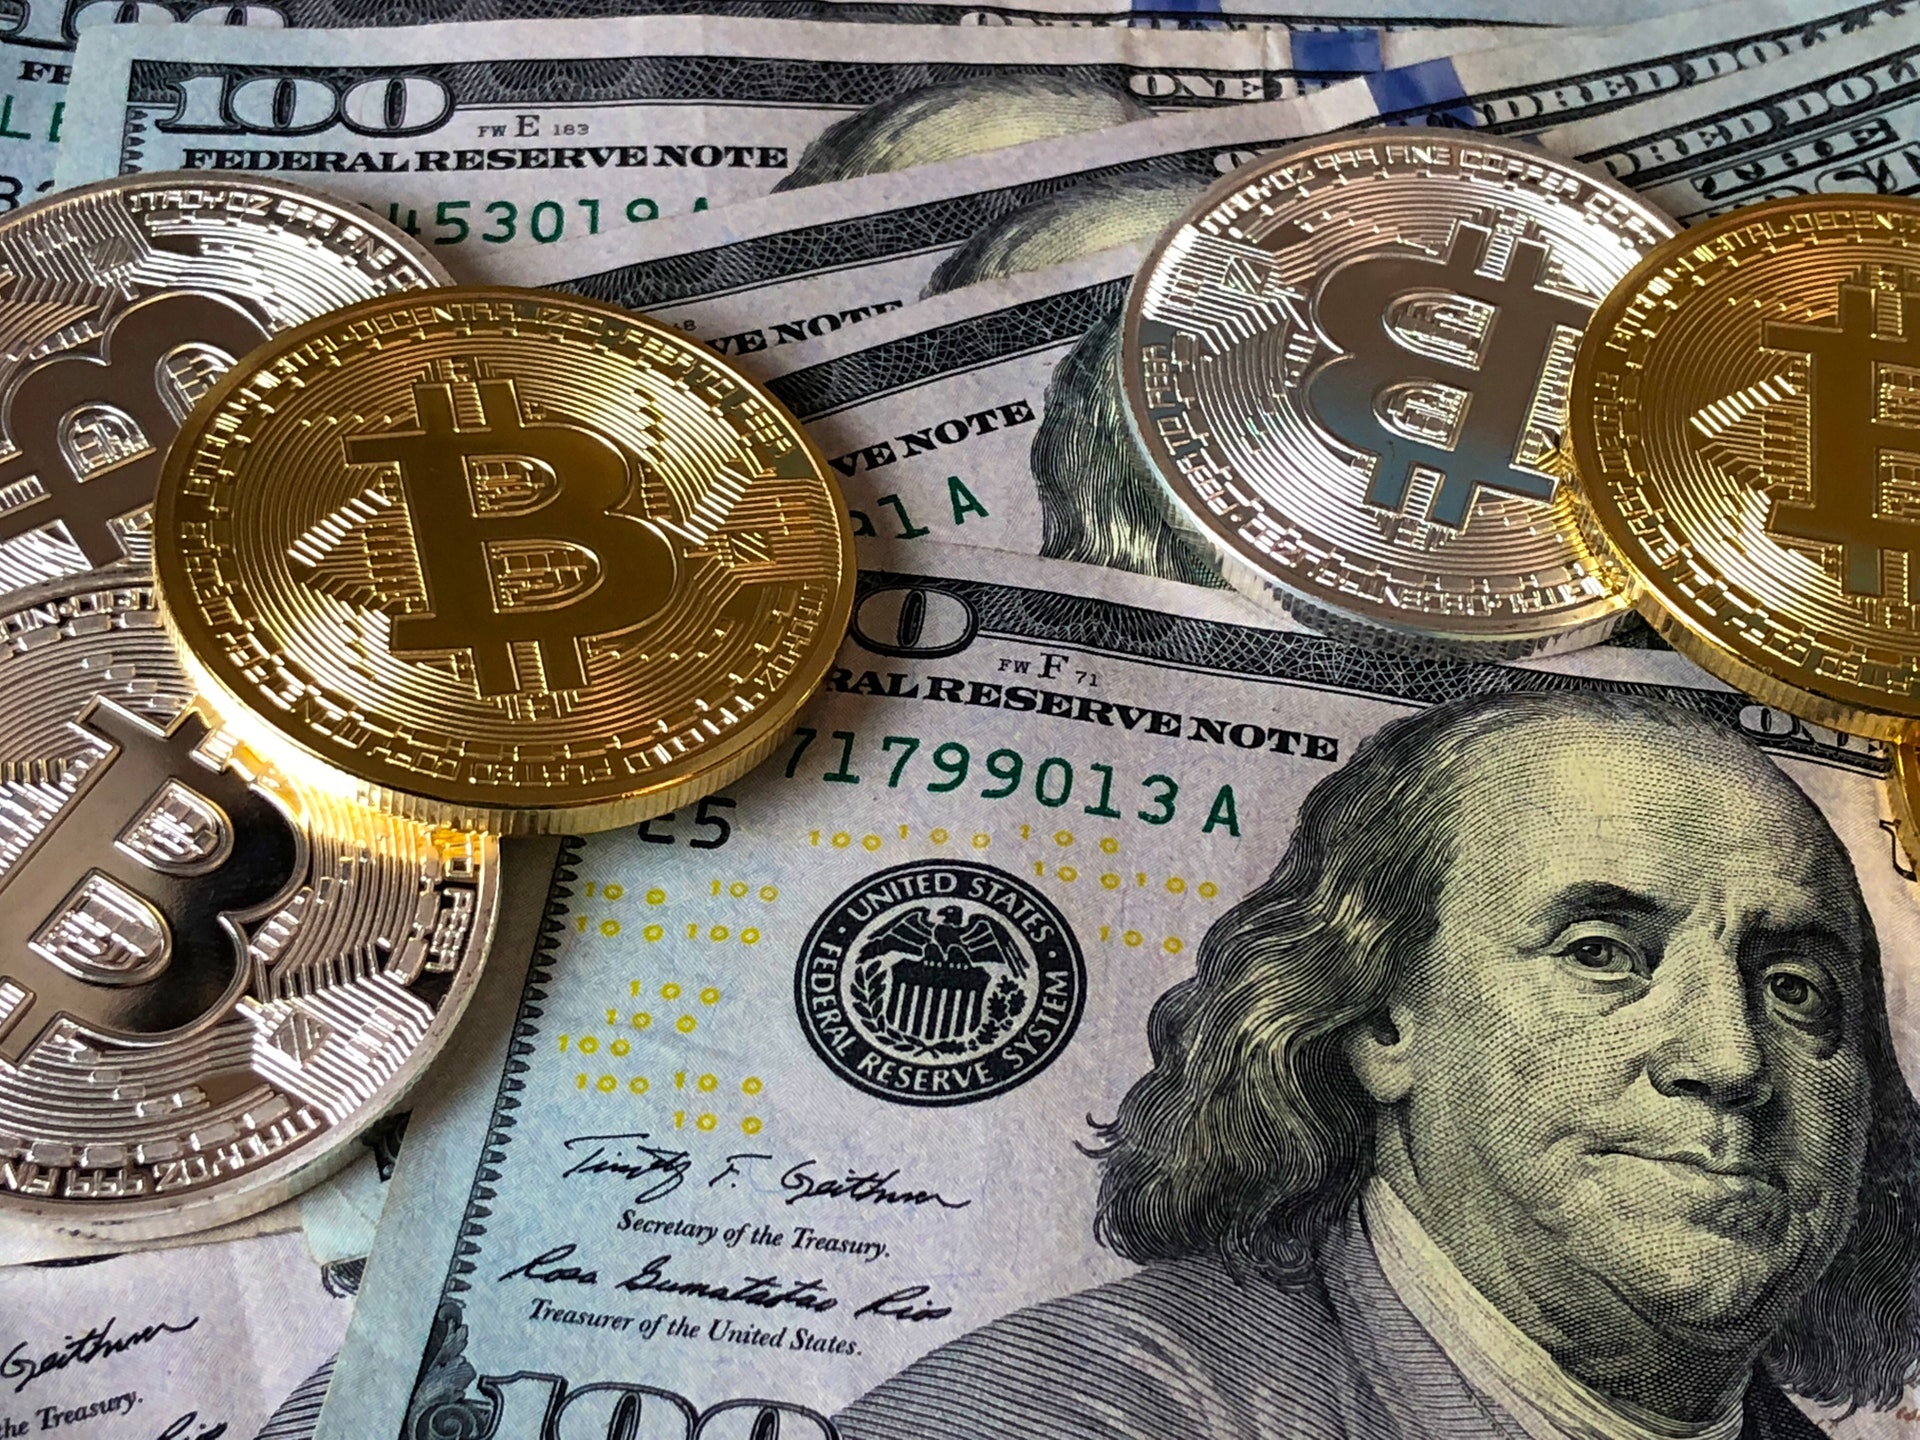

# **Principal Component Analysis**
In this part of the project, the PCA algorithm for economic data visualization is studied.

## Import relevant modules
First, we need to import some relevant libraries for this project.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("Imported modules.")

Imported modules.


## Load the dataset
Here we need to load the provided dataset.

In [2]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [3]:
# Import the dataset.
dataset = pd.read_csv(filepath_or_buffer="EU_Development_Indicators_Dataset.csv")

# Print some rows of the dataset.
dataset

,Country_Name,GDP_growth_annual_pct,GDP_per_capita_KUSD,GDP_current_TUSD,GNI_per_capita_KUSD,Exports_of_goods_and_services_pct_of_GDP,Foreign_direct_investment_BUSD,Inflation_consumer_prices_annual_pct,Unemployment_total_pct_of_total_labor_force,Total_tax_and_contribution_rate_pct_of_profit,Life_expectancy_at_birth_total_years
0,Austria,1.0,44.2,0.4,47.5,53.1,-8.0,0.9,5.7,51.7,81.2
1,Belgium,2.0,41.0,0.5,45.6,77.8,-19.5,0.6,8.5,58.4,81.0
2,Bulgaria,4.0,7.1,0.1,7.5,64.0,2.2,-0.1,9.1,27.0,74.6
3,Croatia,2.4,11.8,0.0,13.0,46.4,0.1,-0.5,16.2,20.0,77.3
4,Cyprus,3.2,23.4,0.0,26.0,70.1,29.0,-2.1,14.9,24.0,80.3
...,...,...,...,...,...,...,...,...,...,...,...
22,Romania,3.0,9.0,0.2,9.6,41.4,4.3,-0.6,6.8,42.0,74.9
23,Slovenia,2.2,20.9,0.0,22.3,77.1,1.7,-0.5,9.0,31.0,80.8
24,Slovak Republic,4.8,16.3,0.1,17.7,92.0,1.5,-0.3,11.5,50.4,76.6
25,Spain,3.8,25.7,1.2,28.4,33.6,23.0,-0.5,22.1,49.8,82.8


## Statistics of the dataset
The statistics of the dataset such as the number of examples, the mean value, the standard deviation and so on can be obtained. In this example, these statistics can in fact demonstrate the economic characteristics of the EU region.

**Question 1:**
Show the statistics of the dataset to describe the mean value, the standard deviation, etc. for all the development indicators of the EU region.

In [4]:
# Get statistics on the dataset.
# Write your code between the lines (~ 1 line)
#################################################
dataset.describe().T
#################################################

,count,mean,std,min,25%,50%,75%,max
GDP_growth_annual_pct,27.0,3.7,4.7,-0.4,1.8,2.4,4.1,25.2
GDP_per_capita_KUSD,27.0,30.2,20.9,7.1,15.3,23.4,42.0,101.4
GDP_current_TUSD,27.0,0.5,0.8,0.0,0.1,0.2,0.5,3.4
GNI_per_capita_KUSD,27.0,30.7,18.4,6.0,17.2,25.2,46.5,72.5
Exports_of_goods_and_services_pct_of_GDP,27.0,69.4,41.9,29.7,42.6,60.3,79.2,221.2
Foreign_direct_investment_BUSD,27.0,28.6,75.1,-19.5,1.2,2.2,16.0,322.6
Inflation_consumer_prices_annual_pct,27.0,-0.1,0.7,-2.1,-0.5,-0.0,0.5,1.1
Unemployment_total_pct_of_total_labor_force,27.0,9.8,4.9,4.6,6.7,9.0,10.9,24.9
Total_tax_and_contribution_rate_pct_of_profit,27.0,41.7,12.5,20.0,33.5,42.0,49.4,64.9
Life_expectancy_at_birth_total_years,27.0,79.5,2.8,74.3,77.4,80.8,81.5,82.8


## Separate numerical indicators
Because in the next step, the data should be normalized, we must separate the country names from the numerical indicators.

**Question 2:**
Separate the dataset's numerical indicators (`X_dataset`) from the country names (`y_dataset`).

In [5]:
# Split the dataset into input features and the output target.
# Write your code between the lines (~ 2 line)
#################################################
y_dataset = dataset.loc[:, dataset.columns.isin(['Country_Name'])]
X_dataset = dataset.loc[:, ~dataset.columns.isin(['Country_Name'])]
#################################################
print("Dataset separated.")

Dataset separated.


## Normalize values
As in the previous projects, the values of different features should range roughly similar. Therefore, normalizing the input features might be a necessary step before building the model. Here we calculate the Z-score for each input feature column.

**Question 3:** Find the normalized input features.

In [6]:
# Convert raw values to their Z-scores
# Calculate the Z-scores of each input feature column.
# Write your code between the lines (~ 3 lines)
#################################################
X_dataset_mean = X_dataset.mean()
X_dataset_std = X_dataset.std()
X_dataset_norm = (X_dataset-X_dataset_mean)/X_dataset_std
#################################################
print("Dataset normalized.")

Dataset normalized.


## Define and implement PCA
At this step, PCA model will be defined with the number of components to be kept. As we are preparing the dataset for 2D visualization, therefore, we should keep two largest principal components. Then, we fit the model with the normalized dataset.

**Question 4:** Set the number of components in the PCA model to two and then fit the model with the normalized dataset.

In [7]:
from sklearn.decomposition import PCA

# Set number of components to 2 and then fit the PCA model.
# Write your code between the lines (~ 2 line)
#################################################
pca = PCA(n_components=2)
pca.fit(X_dataset_norm)

#################################################

PCA(n_components=2)

## Principal components vectors
Afterwards, we can demonstrate the eigenvectors of the selected principal components,

In [8]:
print(pca.components_)

[[ 2.09769928e-01  4.97345498e-01  1.34095169e-01  4.88851672e-01
   2.97829533e-01  2.71525482e-01  3.26397993e-01 -2.22714435e-01
  -6.13966806e-02  3.59654170e-01]
 [-3.72799823e-01 -4.67068052e-04  5.23711318e-01  1.40692553e-01
  -4.21708884e-01 -6.61906157e-02  9.80983292e-02  1.18597791e-01
   5.18470541e-01  3.03697438e-01]]


In [9]:
X_dataset.columns

Index(['GDP_growth_annual_pct', 'GDP_per_capita_KUSD', 'GDP_current_TUSD',
       'GNI_per_capita_KUSD', 'Exports_of_goods_and_services_pct_of_GDP',
       'Foreign_direct_investment_BUSD',
       'Inflation_consumer_prices_annual_pct',
       'Unemployment_total_pct_of_total_labor_force',
       'Total_tax_and_contribution_rate_pct_of_profit',
       'Life_expectancy_at_birth_total_years'],
      dtype='object')

**Question 5:** Using the found eigenvectors, name the top four development indicators from the original dataset that have the largest impacts on each of the two principal components?

**Answer:** 

    For PC1: GDP_per_capita_KUSD and GNI_per_capita_KUSD have the highest impact
    
    For PC2: GDP_current_TUSD and Total_tax_and_contribution_rate_pct_of_profit have the highest impact

## Retained variance
The ratio of variance explained by each principal components can be computed as,

In [10]:
print(pca.explained_variance_ratio_)

[0.34336846 0.2224136 ]


**Question 6:** What is the total ratio of variance that has been retained using the two principal components?

In [11]:
# Find the total ratio of the retained variance.
# Write your code between the lines (~ 1 line)
#################################################
total_explained_variance_ratio = sum(pca.explained_variance_ratio_)
#################################################
print("%.2f"%total_explained_variance_ratio)

0.57


## Principal components
Then, we need to transform the normalized dataset into the reduced dimensions using the found eigenvectors of the principal components. After transformation, the dataset dimensions should be reduced from (27, 10) to (27, 2).

**Question 7:** Transform the normalized dataset and reduce the dimensions using the PCA model.

In [12]:
# Transform the normalized dataset.
# Write your code between the lines (~ 1 line)
#################################################
X_pca = pca.transform(X_dataset_norm)
#################################################
print("original shape:   ", X_dataset_norm.shape)
print("transformed shape:", X_pca.shape)

original shape:    (27, 10)
transformed shape: (27, 2)


## Visualization
Finally, we can visualize the dataset using the computed principal components. This visualization would help us to gain some intuition into the dataset and the economic performance of the EU countries. However, it should be noted that the dimensionality reduction comes with a cost which is discarding some information.

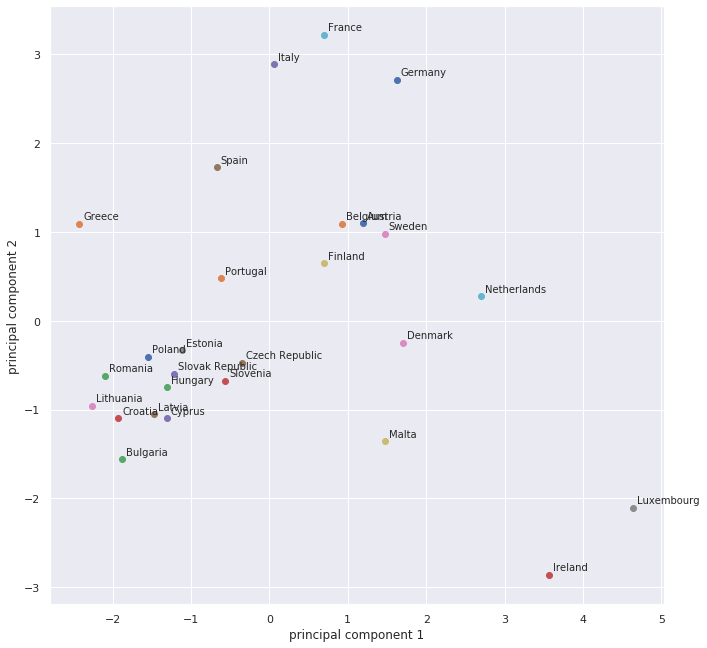

In [13]:
plt.figure(figsize=(11,11))
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
for i,type in enumerate(y_dataset.values.tolist()):
    (x1, x2) = X_pca[i]
    plt.scatter(x1, x2)
    plt.text(x1+0.05, x2+0.05, type[0], fontsize=10)
plt.show()

# **Part 2 - Clustering Algorithm**

As described earlier, clustering algorithms search for an optimal division to cluster data points based on the properties of the data.

In this part of the project, a dataset of handwritten digits is employed which has 1797 images with 64 features. The features are the brightness levels of pixels of 8x8 images. The k-means algorithm initially guesses the pre-determined number of cluster centres. Then, it iteratively assigns each point to the nearest cluster centre and then, recomputes the cluster centres as the mean of the data points in that cluster. This iterative process continues till clusters converge. Here, we use k-means clustering algorithm to cluster similar handwritten digits without knowing their labels.

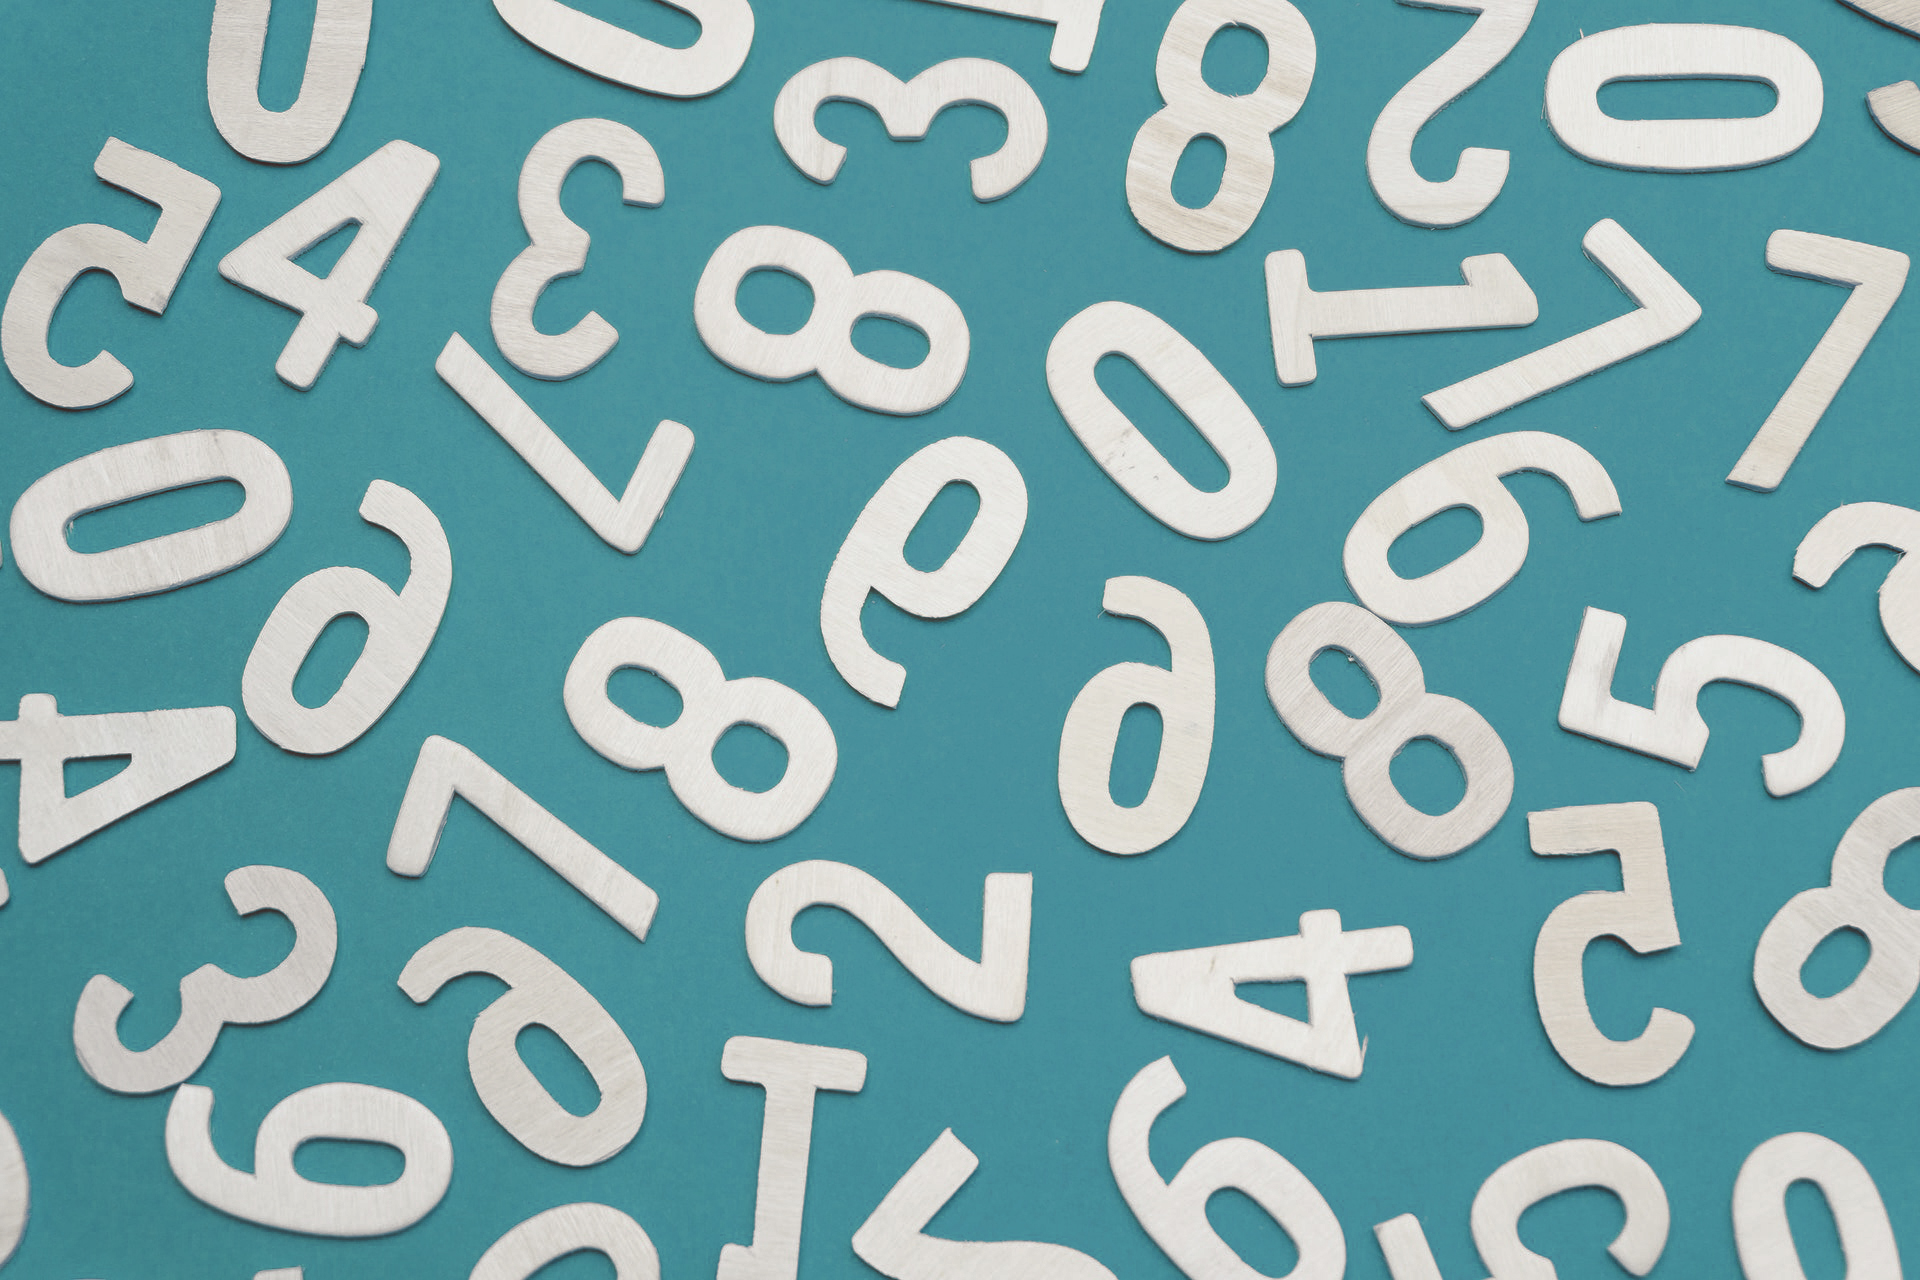

# **k-Means Clustering**
In this part of the project, the k-means clustering algorithm for handwritten digits is studied.

## Load the dataset
Here we need to load the dataset.

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
X_dataset_ = digits.data
y_dataset_ = digits.target

print('Dataset loaded.')

Dataset loaded.


## Define and implement k-means clustering
At this step, the k-means clustering model will be defined with the suitable number of clusters. Then, the model will be fitted with the data.

**Question 8:** Define the k-means clustering algorithm with the suitable number of clusters. Make sure that the random state is set to zero or `random_state=0`. Then fit the model using the X_dataset_.

In [15]:
from sklearn.cluster import KMeans

# Define the k-means clustering model and fit the model.
# Write your code between the lines (~ 2 lines)
#################################################
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_dataset_)

#################################################

KMeans(n_clusters=10, random_state=0)

Then, we use the model to predict the cluster index for each data point.

**Question 9:** Find the cluster index for each data point in the dataset.

In [16]:
# Find cluster index for each data point.
# Write your code between the lines (~ 1 line)
#################################################
# clusters = kmeans.labels_
clusters = kmeans.predict(X_dataset_)
#################################################
kmeans.cluster_centers_.shape

(10, 64)

The 10 cluster centres are in fact the mean images representing the centres of the found clusters of the handwritten digits. Here is the visualization of the cluster centres as 8x8 images.

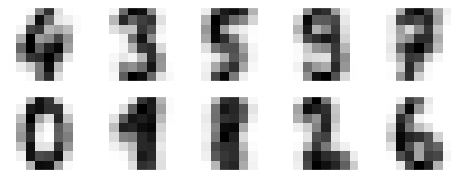

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

The cluster centres, as we can see are very similar to actual digits. However, the order of the clusters is most probably different from the actual labels. This needs to be fixed by assigning the true label of (most often) points in each cluster to them.

In [18]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_dataset_[mask])[0]

print('Cluster indexes fixed.')

Cluster indexes fixed.


## Performance of k-means clustering
Finally, the performance of the k-means clustering as an unsupervised algorithm can be determined based on the similarity of the actual digits in each cluster.

**Question 10:** Find the accuracy score of the k-means clustering in grouping similar digits.

In [19]:
from sklearn.metrics import accuracy_score

# Find the accuracy score of the k-means clustering by comparing the y_dataset_
# and labels from the previous cell.
# Write your code between the lines (~ 1 line)
#################################################
kmeans_accuracy = accuracy_score(labels,y_dataset_)
#################################################
print(kmeans_accuracy)

0.7935447968836951


The confusion matrix is another tool to get an insight into the performance of the model. It shows which digits are the main source of confusion and the most difficult ones for the model to cluster correctly.

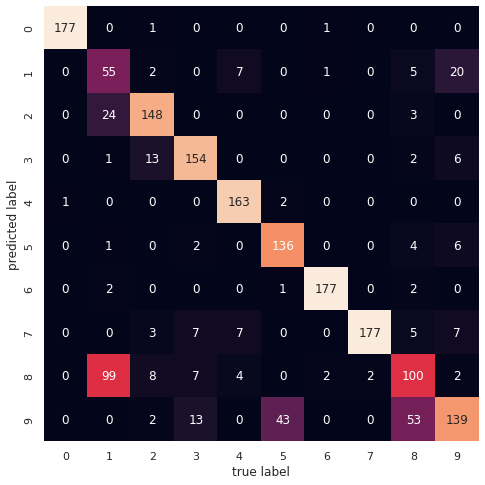

In [20]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
plt.figure(figsize=(8,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Question 11:** According to the confusion matrix, which number was the most difficult for the model to cluster correctly?

**Answer:** 

Since number 1 had the most incorrect classifications to number 8 and number 2, it was the most difficult number for the model to cluster correctly

## Optional hints
If you need assistance, you may click on the cell below to see the hints for each question.

In [21]:
#@title Hints

# Question 1: To find the statistics, you can use the pandas command "DataFrame.describe()".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Question 2: To separate a column of the dataset, you can use
# the pandas command "DataFrame.pop(item)".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html

# Question 3: The formula for z.score normalization is
# "z-score = (dataset - dataset_mean)/dataset_standard_deviation".
# To find the mean value use the pandas command "DataFrame.mean()" and
# to find the standard deviation use the pandas command "DataFrame.std()".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html

# Question 4: First, set the PCA with the correct number of components,
# n_components=2. Then, you need to fit the model with the normalized dataset.
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Question 5: Consider the two eigenvectors from running the last cell. Then,
# for each principal component, find the four largest (absolute) values and their
# corresponding development indicator.

# Question 6: Use the information from the last cell.

# Question 7: Apply the dimensionality reduction on the normalized dataset.
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Question 8: First, set the k-means clustering with the correct number of clusters
# and also random_state=0. Then, fit the model with the handwritten digits data.
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Question 9: Find the cluster index for each data point in the dataset.
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Question 10: Find the accuracy score, by comparing the predicted indexes with
# their actual labels for all the dataset.
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

# Question 11: Self-explanatory!

# Best of luck!
